In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from ISLP import load_data
import seaborn as sns


In [4]:
df = load_data('Boston')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [13]:
x = df.drop(columns='medv')
y = df['medv']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [105]:
# split the data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=42) # by default it uses 0.7 and 0.3
# train the model using max features 6 and number of estimators 100
test_errors = []
def rf_model(x_train, y_train, x_test, y_test, features_number, estimator_number):
    rf = RandomForestRegressor(max_features= features_number, n_estimators= estimator_number, random_state=42, n_jobs=1) # n_jobs=-1 uses all available cpu cores
    rf = rf.fit(x_train, y_train)
    y_hat = rf.predict(x_test)
    test_error = np.mean((y_hat - y_test)**2)
    return test_error

test_errors = []
features = ["sqrt", 0.5, 1.0]
estimators = range(1,300,30)

for feature in features:
    for estimator in estimators: 
        test_error = rf_model(X_train, Y_train, X_test, Y_test, feature, estimator)
        test_errors.append([test_error, feature,estimator]) 

results = pd.DataFrame(test_errors, 
                            columns = ['test_err', 'n_feature', 'n_estimator'])



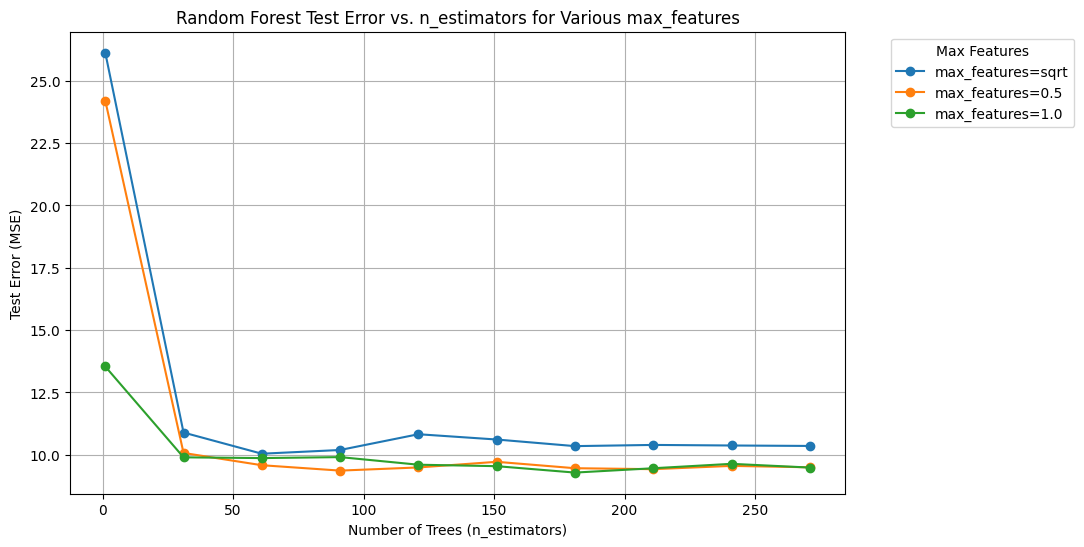

In [106]:
# plot the test error for different number of estimators and features
# **Matplotlib Plot (without Seaborn)**
plt.figure(figsize=(10, 6))

# Loop over unique max_features values to plot separate lines
for feature in results["n_feature"].unique():
    subset = results[results["n_feature"] == feature]
    plt.plot(subset["n_estimator"], subset["test_err"], marker="o", label=f"max_features={feature}")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Test Error (MSE)")
plt.title("Random Forest Test Error vs. n_estimators for Various max_features")
plt.legend(title="Max Features", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend to avoid overlap
plt.grid(True)
plt.show()

In the Random Forest model, max_features=1 led to the lowest test error, indicating that individual trees benefit from high diversity when selecting features at each split. However, using max_features=0.5 or "sqrt" still performed well by increasing the number of trees, suggesting that the dataset does not suffer from severe feature redundancy. Also, the number of estimators will affect the results as varying models contribute to the final prediction. 